##**Coronary Artery Disease Prediction**

**Importing Libraries**

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

**Data Preprocesing**

In [2]:
df = pd.read_csv('CAD.csv')
df.head(5)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [40]:
df.describe().transpose().style.background_gradient(cmap = 'Greens')

,count,mean,std,min,25%,50%,75%,max
Age,303.000000,58.897690,10.392278,30.000000,51.000000,58.000000,66.000000,86.000000
Weight,303.000000,73.831683,11.987358,48.000000,65.000000,74.000000,81.000000,120.000000
Length,303.000000,164.716172,9.327661,140.000000,158.000000,165.000000,171.000000,188.000000
BMI,303.000000,27.248339,4.098865,18.115413,24.514380,26.775510,29.411765,40.900658
DM,303.000000,0.297030,0.457706,0.000000,0.000000,0.000000,1.000000,1.000000
HTN,303.000000,0.590759,0.492507,0.000000,0.000000,1.000000,1.000000,1.000000
Current Smoker,303.000000,0.207921,0.406491,0.000000,0.000000,0.000000,0.000000,1.000000
EX-Smoker,303.000000,0.033003,0.178941,0.000000,0.000000,0.000000,0.000000,1.000000
FH,303.000000,0.158416,0.365734,0.000000,0.000000,0.000000,0.000000,1.000000
BP,303.000000,129.554455,18.938105,90.000000,120.000000,130.000000,140.000000,190.000000


In [41]:
df.median()

Age                     58.00000
Weight                  74.00000
Length                 165.00000
BMI                     26.77551
DM                       0.00000
HTN                      1.00000
Current Smoker           0.00000
EX-Smoker                0.00000
FH                       0.00000
BP                     130.00000
PR                      70.00000
Edema                    0.00000
Typical Chest Pain       1.00000
Function Class           0.00000
Q Wave                   0.00000
St Elevation             0.00000
St Depression            0.00000
Tinversion               0.00000
FBS                     98.00000
CR                       1.00000
TG                     122.00000
LDL                    100.00000
HDL                     39.00000
BUN                     16.00000
ESR                     15.00000
HB                      13.20000
K                        4.20000
Na                     141.00000
WBC                   7100.00000
Lymph                   32.00000
Neut      

In [42]:
df.skew()

Age                   0.134915
Weight                0.418975
Length               -0.031724
BMI                   0.434183
DM                    0.892796
HTN                  -0.371008
Current Smoker        1.446624
EX-Smoker             5.254252
FH                    1.880347
BP                    0.572560
PR                    1.078851
Edema                 4.744882
Typical Chest Pain   -0.166406
Function Class        1.038293
Q Wave                4.019080
St Elevation          4.344883
St Depression         1.260698
Tinversion            0.892796
FBS                   2.276431
CR                    0.950209
TG                    3.781993
LDL                   0.571284
HDL                   1.460644
BUN                   1.818226
ESR                   1.629946
HB                   -0.178627
K                     0.528061
Na                    0.264802
WBC                   1.387689
Lymph                 0.067007
Neut                  0.092295
PLT                   2.589028
EF-TTE  

In [43]:
df.isnull().sum()

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
F

In [8]:
df.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
       'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA',
       'VHD', 'Cath'],
      dtype='object')

In [9]:
df.shape

(303, 55)

**Exploratory Data Analysis**

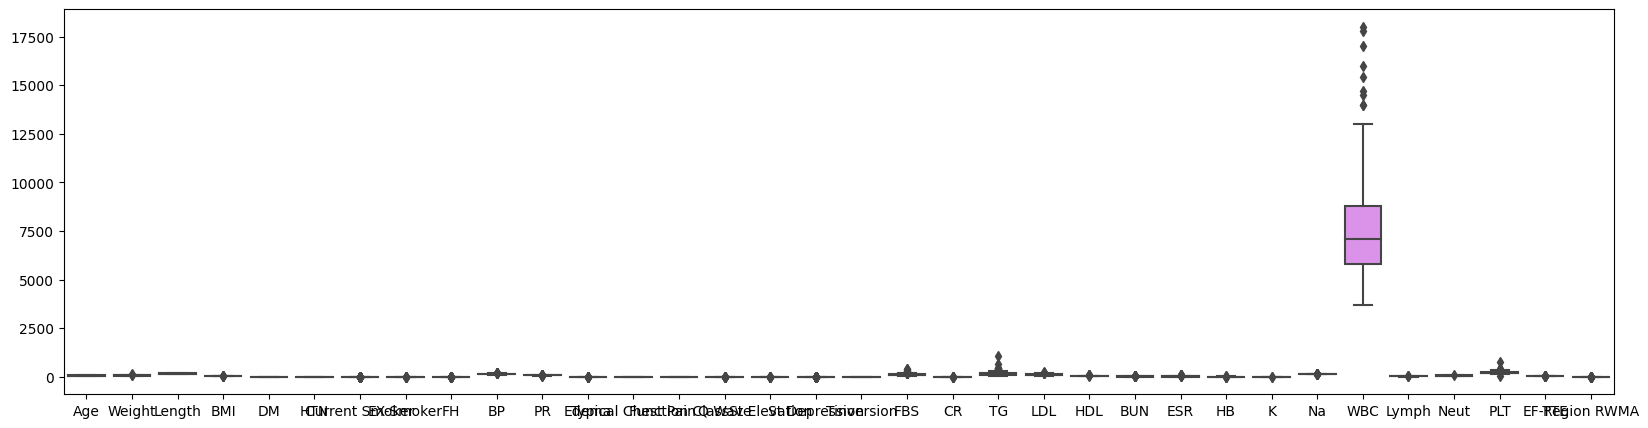

In [11]:
plt.figure(figsize=(20,5))

sns.boxplot(df)

plt.show()

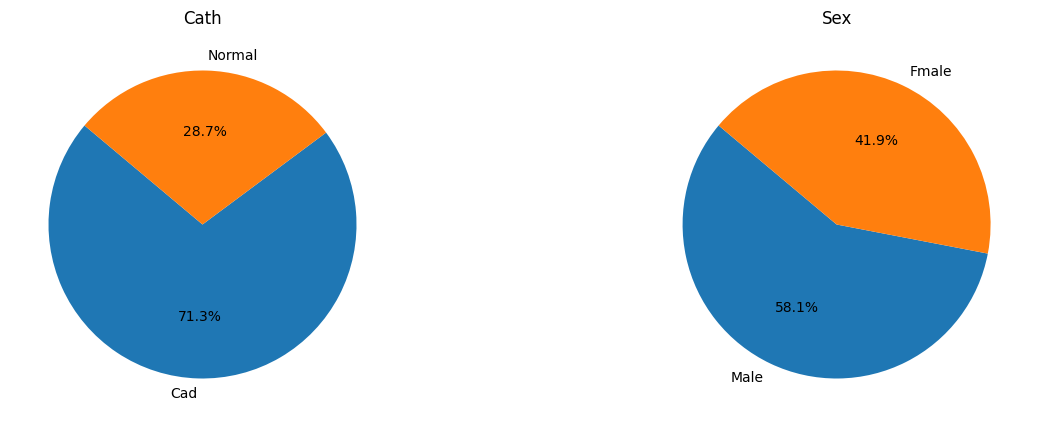

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].pie(df['Cath'].value_counts(), labels=df['Cath'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[0].set_title('Cath')

ax[1].pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1].set_title('Sex')

plt.show()

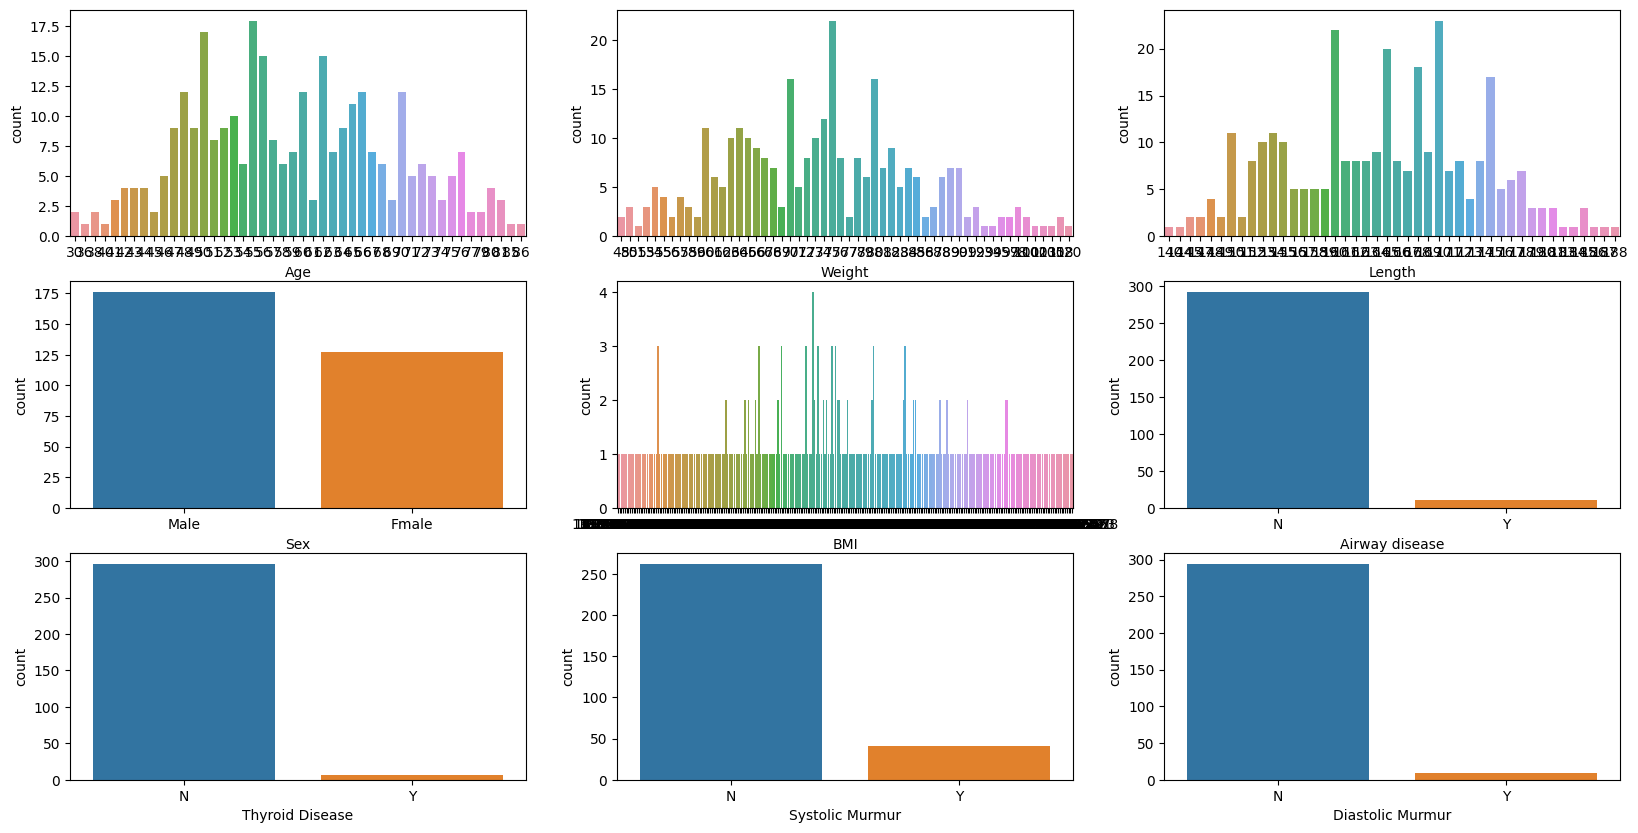

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))

sns.countplot(data = df, x = 'Age',ax =ax[0,0])
sns.countplot(data = df, x = 'Weight', ax =ax[0,1])
sns.countplot(data = df, x = 'Length', ax =ax[0,2])
sns.countplot(data = df, x = 'Sex', ax =ax[1,0])
sns.countplot(data = df, x = 'BMI', ax =ax[1,1])
sns.countplot(data = df, x = 'Airway disease', ax =ax[1,2])
sns.countplot(data = df, x = 'Thyroid Disease', ax =ax[2,0])
sns.countplot(data = df, x = 'Systolic Murmur', ax =ax[2,1])
sns.countplot(data = df, x = 'Diastolic Murmur', ax =ax[2,2])

plt.show()

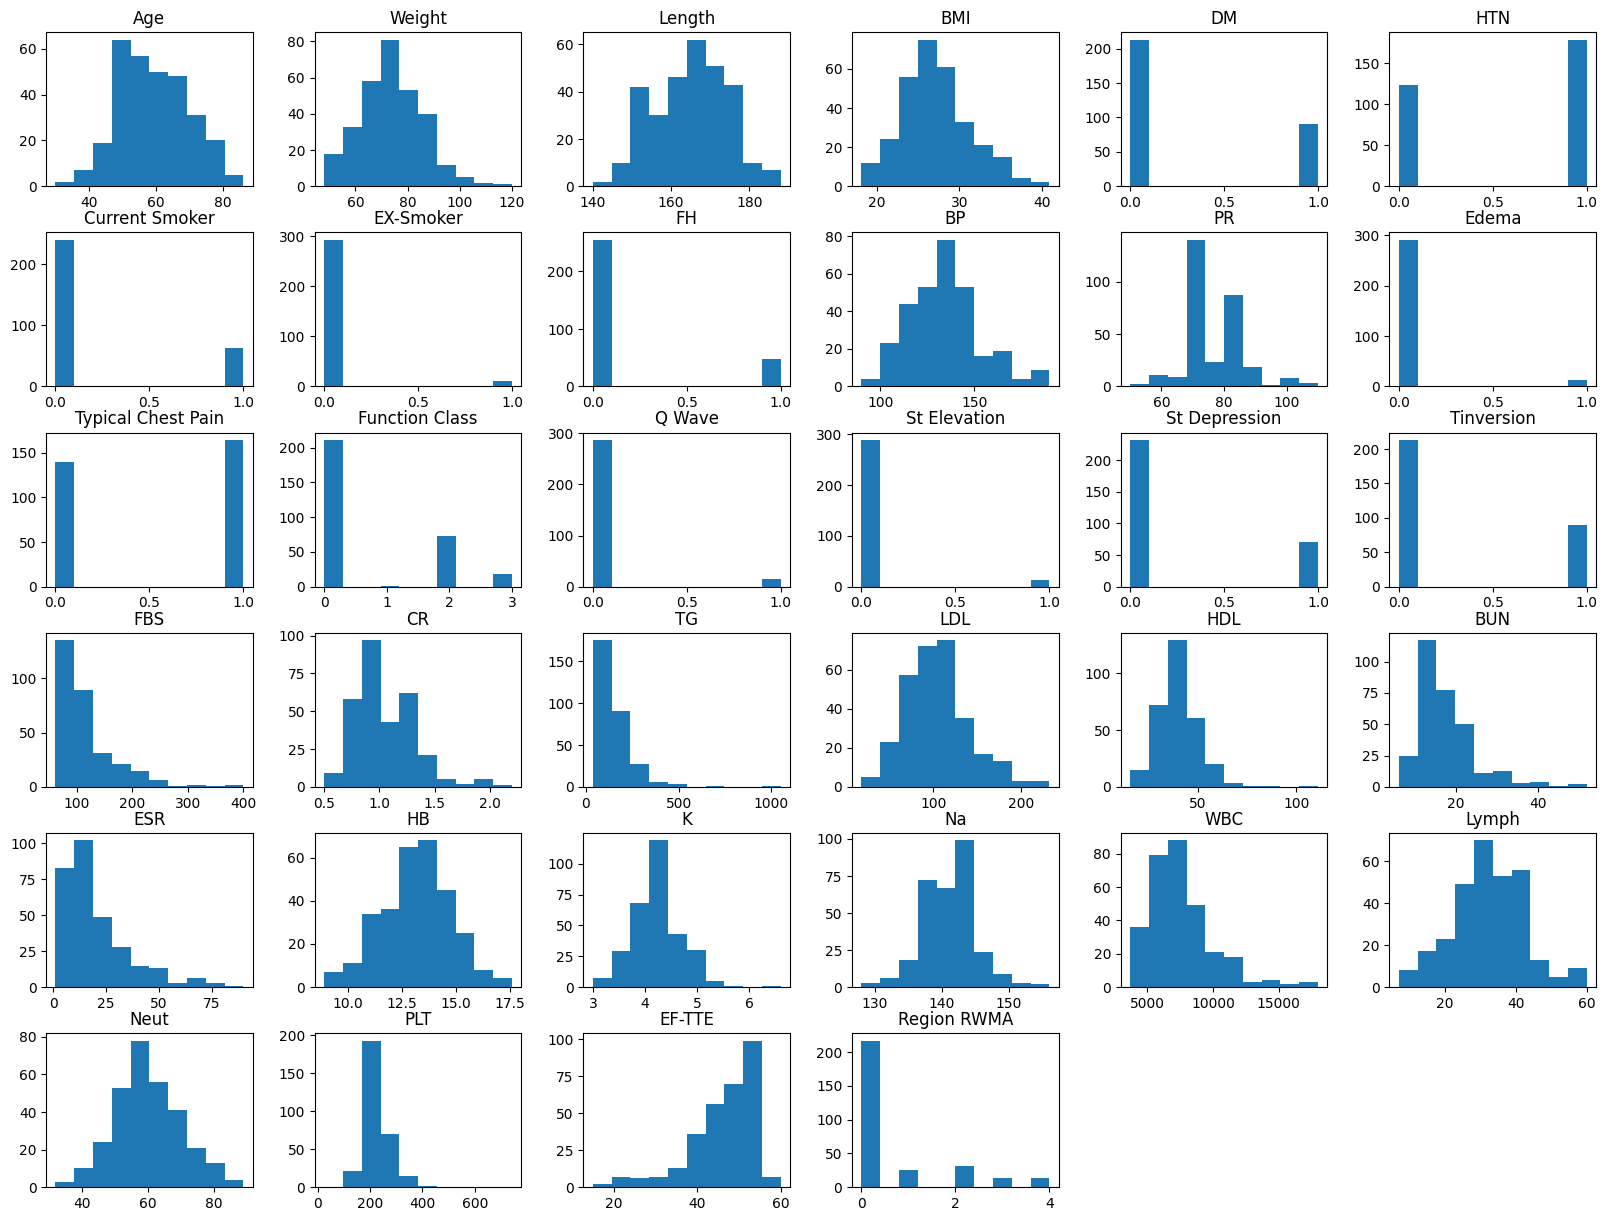

In [24]:
df.hist(figsize = (20,15), grid = False)
plt.show()

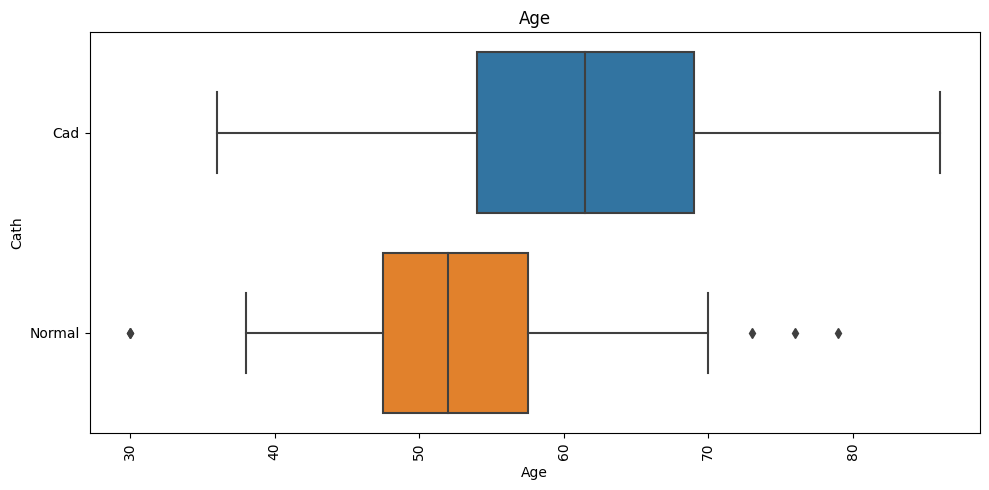

In [26]:
plt.figure( figsize=(10, 5) )

sns.boxplot(data=df, x='Age', y='Cath')

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Cath')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

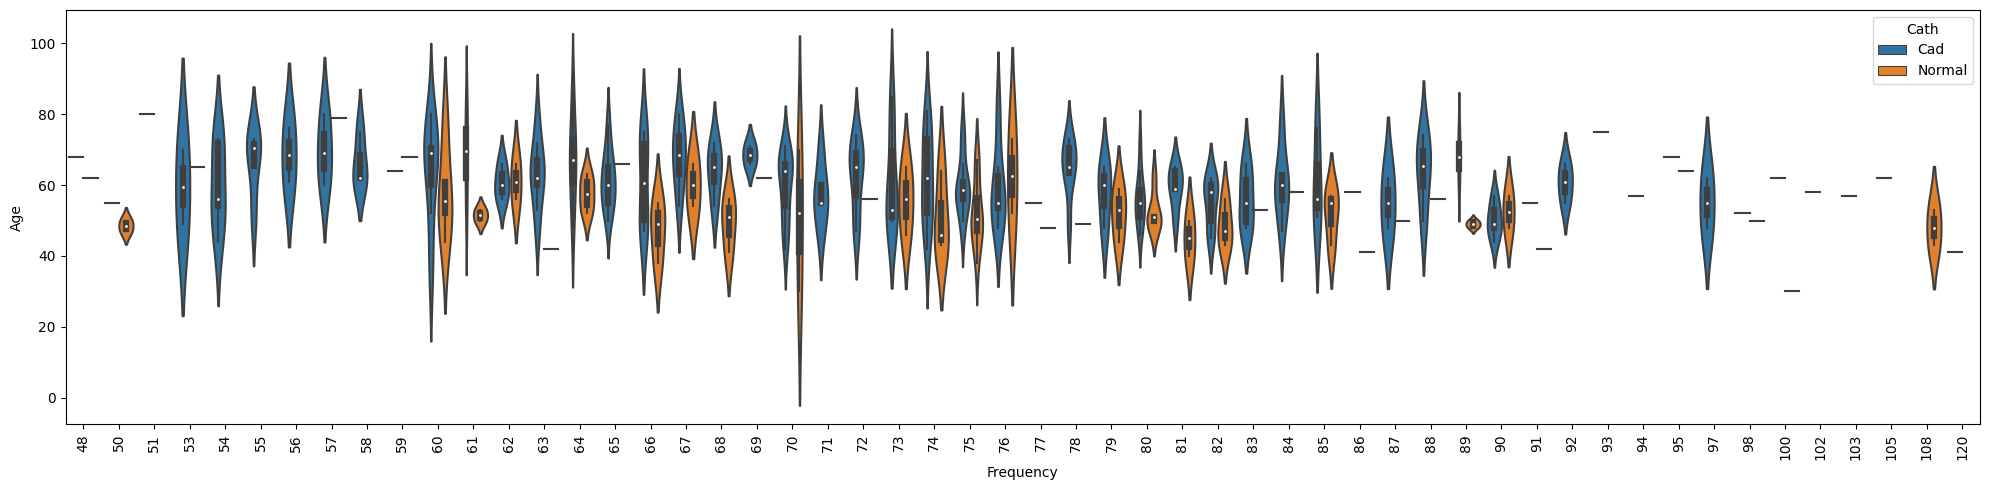

In [29]:
plt.figure(figsize=(20, 5))

sns.violinplot(data=df, x='Weight', y='Age', hue='Cath', Split = True)

plt.xlabel('Weight')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

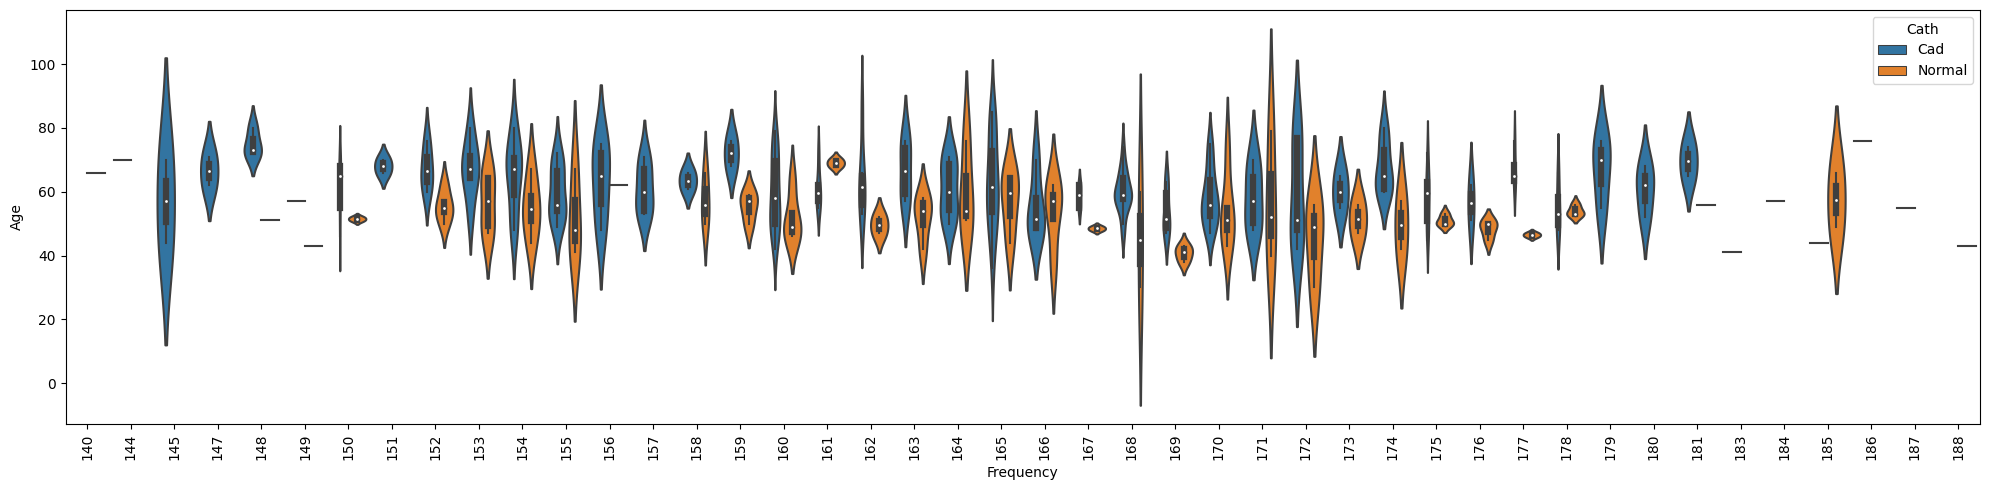

In [30]:
plt.figure(figsize=(20, 5))

sns.violinplot(data=df, x='Length', y='Age', hue='Cath', Split = True)

plt.xlabel('Frequency')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

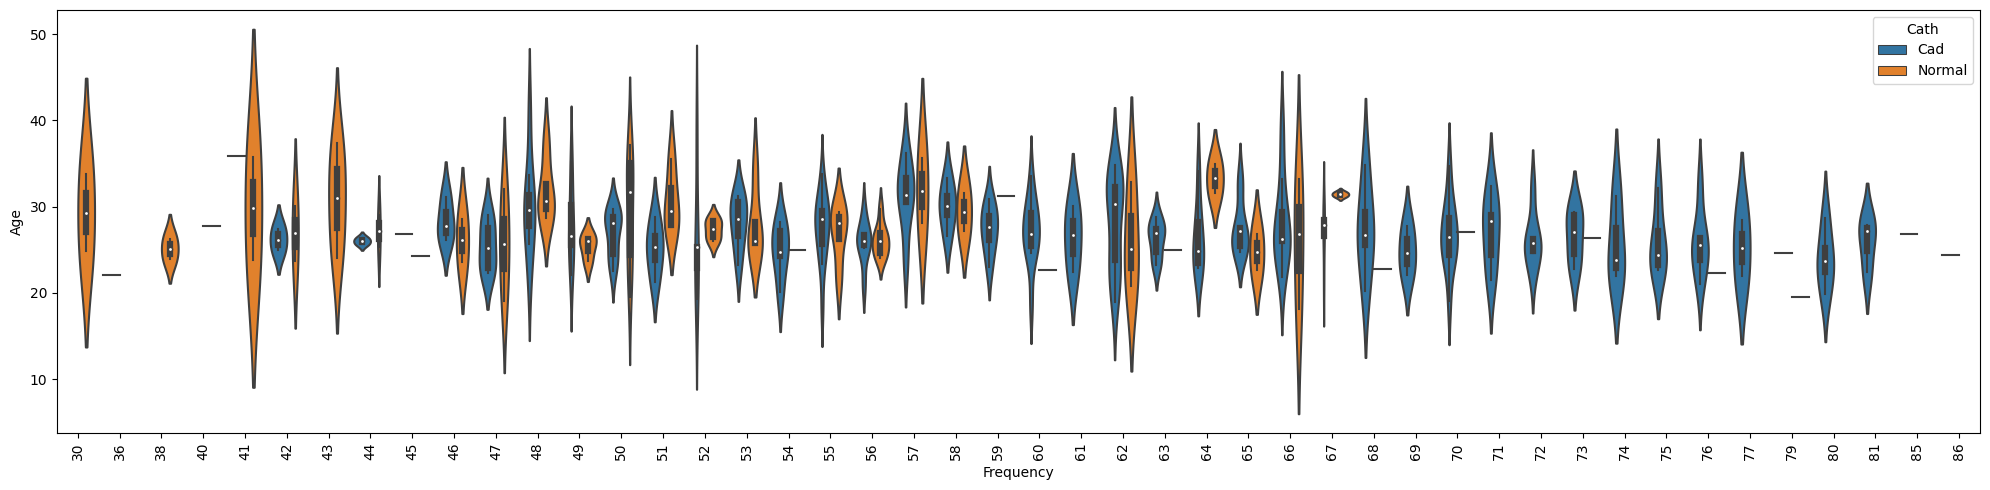

In [35]:
plt.figure(figsize=(20, 5))

sns.violinplot(data=df, x='Age', y='BMI', hue='Cath', Split = True)

plt.xlabel('Frequency')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.grid(False)
plt.tight_layout()
plt.show()

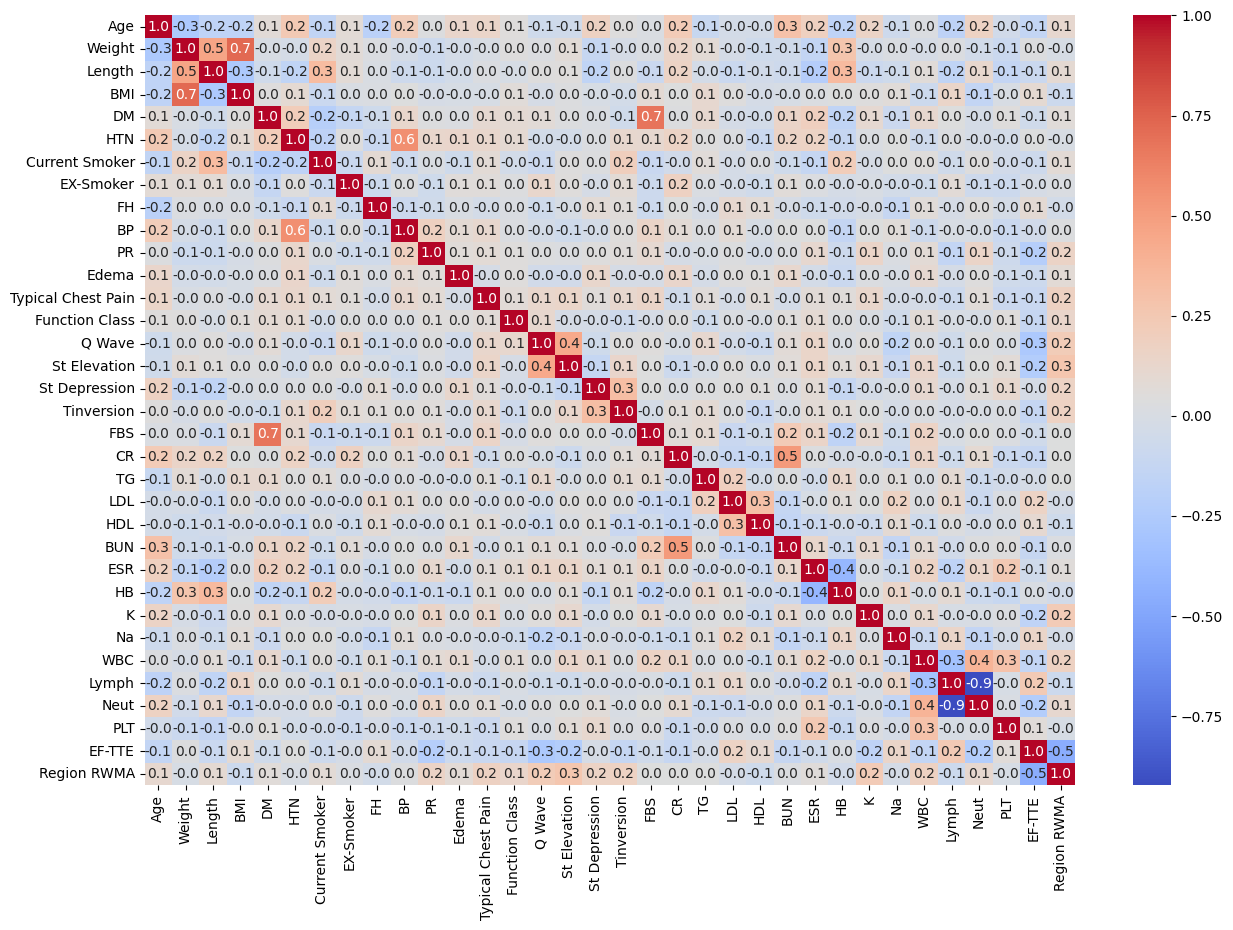

In [52]:
plt.figure(figsize=(15, 10))

sns.heatmap(df.corr(), annot = True, fmt = '.1f', cmap='coolwarm')

plt.show()

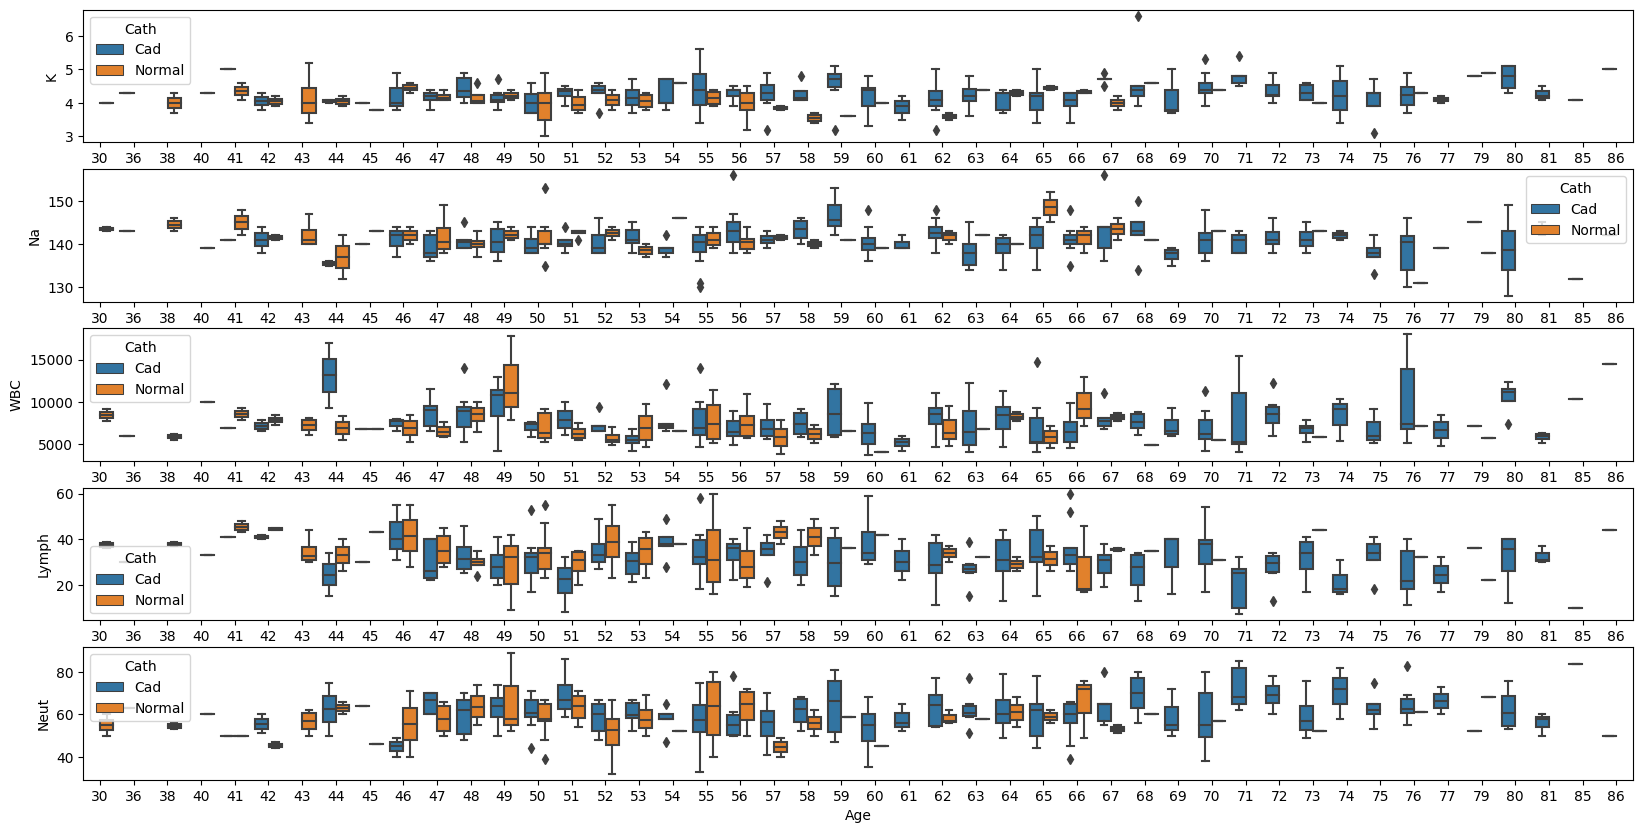

In [57]:
fig, ax = plt.subplots(5, 1, figsize=(20, 10))

sns.boxplot(data=df, x='Age', y='K', hue ='Cath', ax = ax[0])
sns.boxplot(data=df, x='Age', y='Na', hue ='Cath', ax = ax[1])
sns.boxplot(data=df, x='Age', y='WBC', hue ='Cath', ax = ax[2])
sns.boxplot(data=df, x='Age', y='Lymph', hue ='Cath', ax = ax[3])
sns.boxplot(data=df, x='Age', y='Neut', hue ='Cath', ax = ax[4])

plt.show()

**Encoder**

In [63]:
lb = LabelEncoder()
df['Sex'] = lb.fit_transform(df['Sex'])
df['Obesity'] = lb.fit_transform(df['Obesity'])
df['CRF'] = lb.fit_transform(df['CRF'])
df['CVA'] = lb.fit_transform(df['CVA'])
df['Airway disease'] = lb.fit_transform(df['Airway disease'])
df['Thyroid Disease'] = lb.fit_transform(df['Thyroid Disease'])
df['CHF'] = lb.fit_transform(df['CHF'])
df['DLP'] = lb.fit_transform(df['DLP'])
df['Weak Peripheral Pulse'] = lb.fit_transform(df['Weak Peripheral Pulse'])
df['Lung rales'] = lb.fit_transform(df['Lung rales'])
df['Systolic Murmur'] = lb.fit_transform(df['Systolic Murmur'])
df['Diastolic Murmur'] = lb.fit_transform(df['Diastolic Murmur'])
df['Dyspnea'] = lb.fit_transform(df['Dyspnea'])
df['Atypical'] = lb.fit_transform(df['Atypical'])
df['Nonanginal'] = lb.fit_transform(df['Nonanginal'])
df['Exertional CP'] = lb.fit_transform(df['Exertional CP'])
df['LowTH Ang'] = lb.fit_transform(df['LowTH Ang'])
df['LVH'] = lb.fit_transform(df['LVH'])
df['Poor R Progression'] = lb.fit_transform(df['Poor R Progression'])
df['VHD'] = lb.fit_transform(df['VHD'])
df['Cath'] = lb.fit_transform(df['Cath'])
df.head(1)

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,1,0


**Select Best Features**

In [64]:
X = df.drop(columns=['Cath'])
y = df['Cath']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
24,Typical Chest Pain,125.837044,1.241567e-24
27,Atypical,62.962163,4.187701e-14
0,Age,44.035356,1.499035e-10
52,Region RWMA,33.393458,1.879212e-08
6,HTN,27.174973,3.459458e-07
28,Nonanginal,24.467563,1.258833e-06
5,DM,20.566387,8.326552e-06
17,BP,18.035363,2.893144e-05
34,Tinversion,17.902277,3.090413e-05
51,EF-TTE,17.437671,3.892167e-05


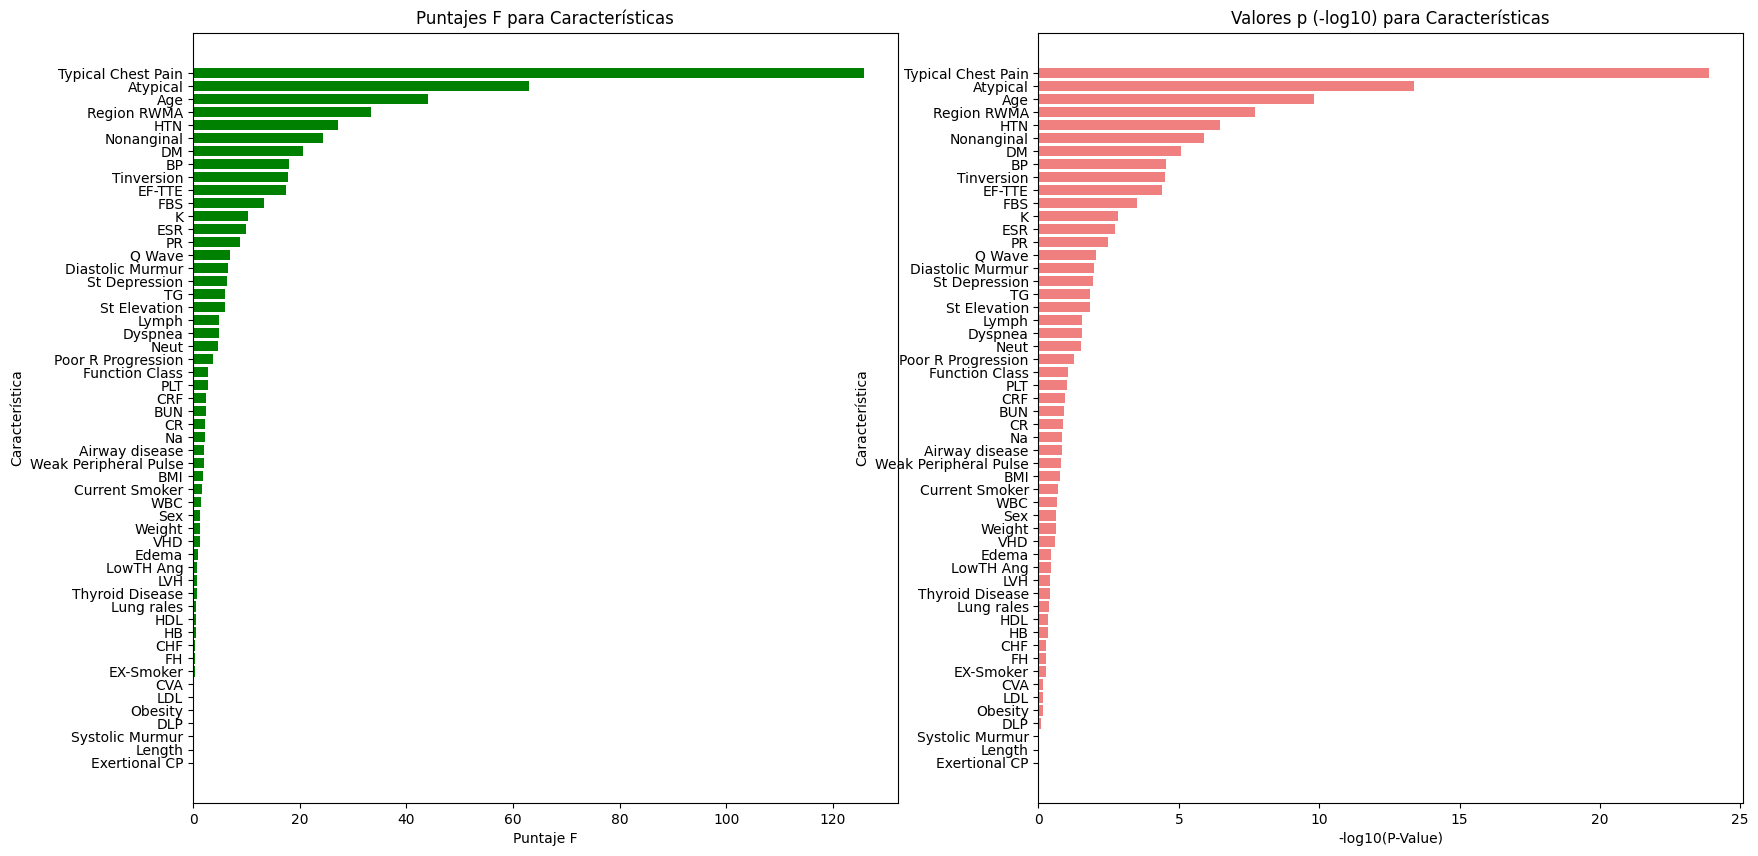

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='Green')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [69]:
cols = feature_scores_df[feature_scores_df['F_Score']>=1].Feature.to_list()

**Modeling and Evaluation**

In [70]:
X_M = df[cols]
Y_M = df['Cath']
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

**Train Test Split**

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.25, random_state=42)

**Logistic Regression**

In [73]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        55
           1       0.78      0.67      0.72        21

    accuracy                           0.86        76
   macro avg       0.83      0.80      0.81        76
weighted avg       0.85      0.86      0.85        76

accuracy:  0.8552631578947368
mean_absolute_error:  0.14473684210526316
mean_squared_error:  0.14473684210526316


**Random Forest Classifier**

In [74]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        55
           1       0.87      0.62      0.72        21

    accuracy                           0.87        76
   macro avg       0.87      0.79      0.82        76
weighted avg       0.87      0.87      0.86        76

accuracy:  0.868421052631579
mean_absolute_error:  0.13157894736842105
mean_squared_error:  0.13157894736842105


**Decision Tree**

In [75]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        55
           1       0.52      0.71      0.60        21

    accuracy                           0.74        76
   macro avg       0.69      0.73      0.70        76
weighted avg       0.77      0.74      0.75        76

accuracy:  0.7368421052631579
mean_absolute_error:  0.2631578947368421
mean_squared_error:  0.2631578947368421


**SVC**

In [79]:
model_SVC = SVC(kernel = 'linear' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.76      0.76      0.76        21

    accuracy                           0.87        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.87      0.87      0.87        76

accuracy:  0.868421052631579
mean_absolute_error:  0.13157894736842105
mean_squared_error:  0.13157894736842105


**KNeighborsClassifier**

In [82]:
model_NEG = KNeighborsClassifier(n_neighbors=5)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        55
           1       0.74      0.67      0.70        21

    accuracy                           0.84        76
   macro avg       0.81      0.79      0.80        76
weighted avg       0.84      0.84      0.84        76

accuracy:  0.8421052631578947
mean_absolute_error:  0.15789473684210525
mean_squared_error:  0.15789473684210525


0    55
1    21
Name: Cath, dtype: int64


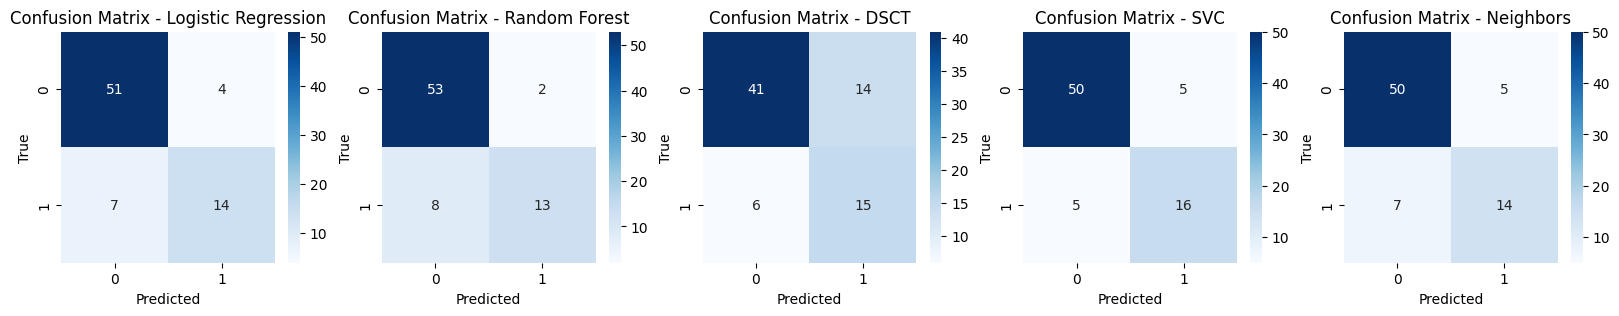

In [83]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
SVC_ = confusion_matrix(y_test, model_SVC_Pred)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(SVC_, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - SVC')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - Neighbors')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

print(y_test.value_counts())
plt.show()

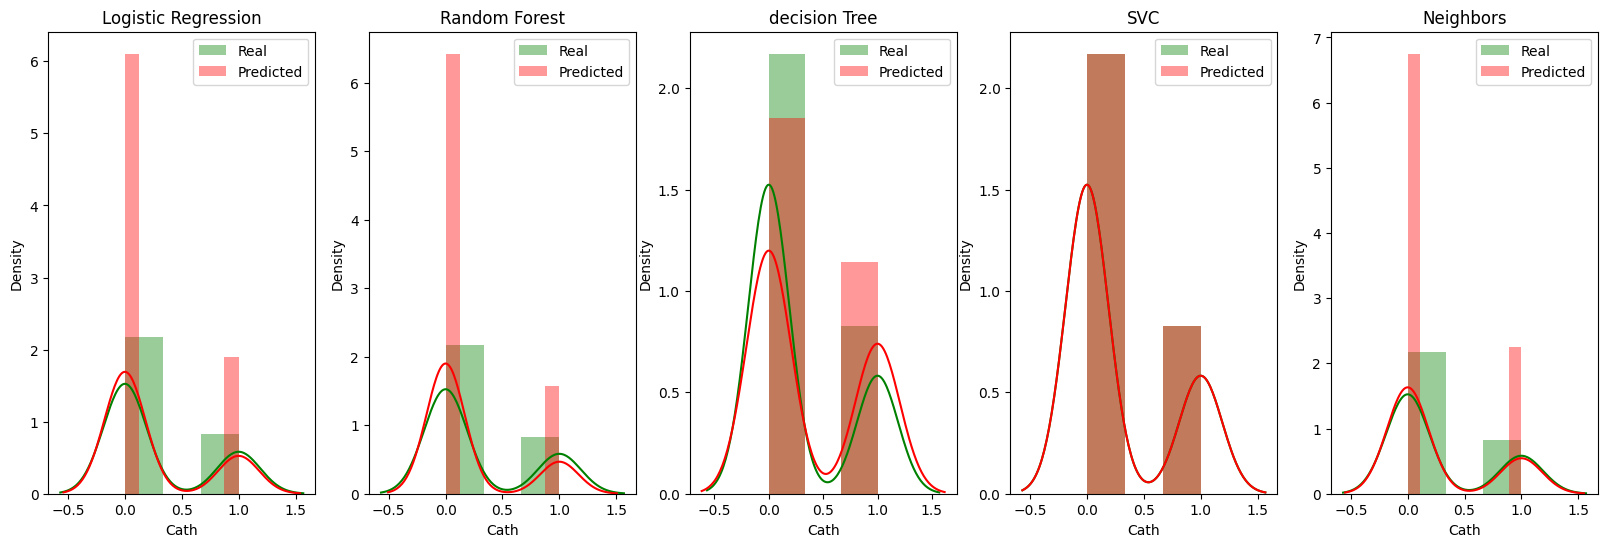

In [84]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('SVC')
ax[4].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
plt.show()

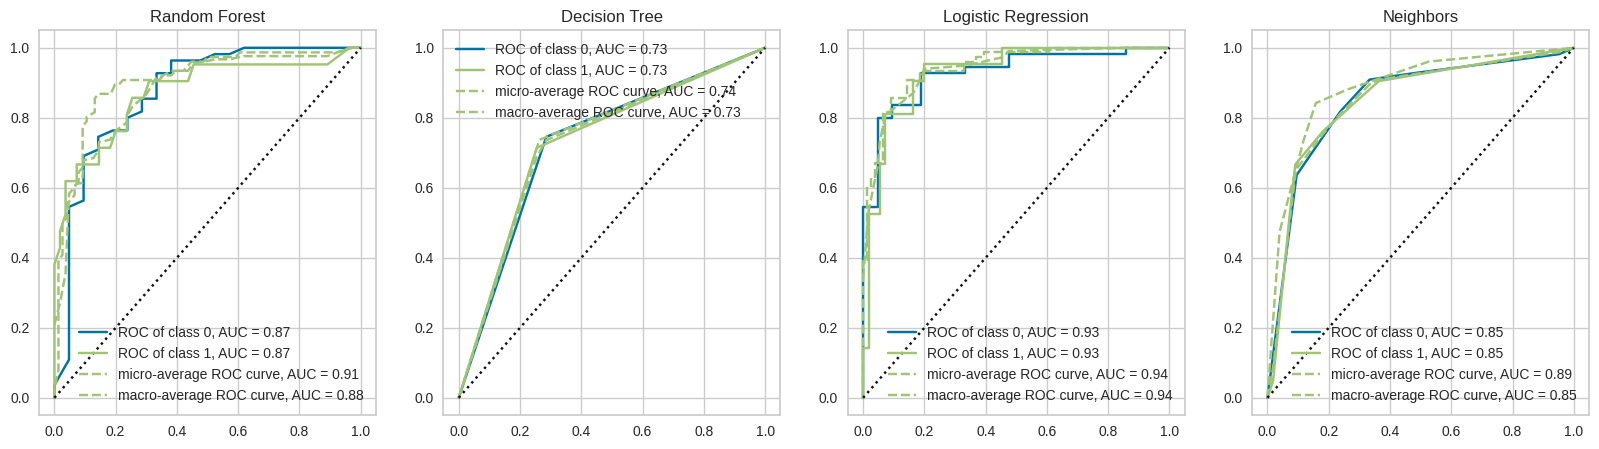

In [92]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

visualizer_train_R = ROCAUC(random_forest_model, ax=axs[0])
visualizer_train_R.fit(X_train, y_train)
visualizer_train_R.score(X_test, y_test)

visualizer_train_D = ROCAUC(decision_tree_model, ax=axs[1])
visualizer_train_D.fit(X_train, y_train)
visualizer_train_D.score(X_test, y_test)

visualizer_train_l = ROCAUC(logistic_model, ax=axs[2])
visualizer_train_l.fit(X_train, y_train)
visualizer_train_l.score(X_test, y_test)

visualizer_train_sv = ROCAUC(model_NEG, ax=axs[3])
visualizer_train_sv.fit(X_train, y_train)
visualizer_train_sv.score(X_test, y_test)

axs[0].set_title('Random Forest')
axs[1].set_title('Decision Tree')
axs[2].set_title('Logistic Regression')
axs[3].set_title('Neighbors')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()


plt.show()